# Árvores de decisão

## Intuição

In [235]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data[:,2:], iris.target

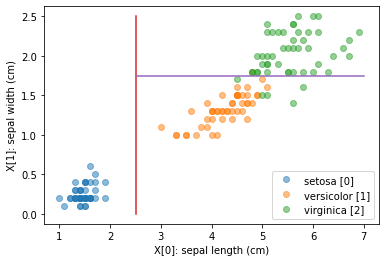

In [236]:
import matplotlib.pyplot as plt
plt.xlabel(f"X[0]: {iris.feature_names[0]}")
plt.ylabel(f"X[1]: {iris.feature_names[1]}")
for k in set(y):
    plt.plot(X[:,0][y==k], X[:,1][y==k], "o", label=f"{iris.target_names[k]} [{k}]", alpha=0.5)
plt.plot(
    [2.5, 2.5],
    [0  , 2.5]
)
plt.plot(
    [2.5 , 7   ],
    [1.75, 1.75]
)
plt.legend()
plt.show()

In [237]:
from sklearn.metrics import accuracy_score
import numpy as np
from scipy import stats

class Arvore():
    def __init__(self):
        self.respostaFolha = None
    def fit(self, X, y):
        self.respostaFolha = stats.mode(y)[0]
    def predict(self, X):
        y = np.empty((X.shape[0]))
        y[:] = self.respostaFolha
        return y

modelo = Arvore()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

(0.3333333333333333,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,

In [238]:
from sklearn.metrics import accuracy_score
import numpy as np
from scipy import stats

class Arvore():
    def __init__(self):
        self.caracteristica = None
        self.limiar = None
        self.respostaMaior = None
        self.respostaMenor = None
        self.respostaFolha = None
    def fit(self, X, y):
        self.caracteristica = 0
        self.limiar = 2.5
        maior = X[:,self.caracteristica] > self.limiar
        self.respostaMaior = Arvore()
        self.respostaMaior.respostaFolha = stats.mode(y[maior])[0]
        self.respostaMenor = Arvore()
        self.respostaMenor.respostaFolha = stats.mode(y[~maior])[0]
    def predict(self, X):
        y = np.empty((X.shape[0]))
        if self.respostaFolha is None:
            maior = X[:,self.caracteristica] > self.limiar
            y[maior] = self.respostaMaior.predict(X[maior,:])
            y[~maior] = self.respostaMenor.predict(X[~maior,:])
        else:
            y[:] = self.respostaFolha
        return y

modelo = Arvore()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

(0.6666666666666666,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,

In [239]:
def printArvore(arvore):
    if arvore is not None:
        printArvore(arvore.respostaMenor)
        print(f"{arvore.limiar}, ")
        printArvore(arvore.respostaMaior)
printArvore(modelo)       

None, 
2.5, 
None, 


In [240]:
from sklearn.metrics import accuracy_score
import numpy as np
from scipy import stats

class Arvore():
    def __init__(self):
        self.caracteristica = None
        self.limiar = None
        self.respostaMaior = None
        self.respostaMenor = None
        self.respostaFolha = None
    def fit(self, X, y):
        self.caracteristica = 0
        self.limiar = np.mean(X[:,self.caracteristica])
        maior = X[:,self.caracteristica] > self.limiar
        if sum(maior) > 0 and sum(maior) < len(y):
            self.respostaMaior = Arvore()
            self.respostaMaior.fit(X[maior,:], y[maior])
            self.respostaMenor = Arvore()
            self.respostaMenor.fit(X[~maior,:], y[~maior])
        else:
            self.respostaFolha = stats.mode(y)[0]
    def predict(self, X):
        y = np.empty((X.shape[0]))
        if self.respostaFolha is None:
            maior = X[:,self.caracteristica] > self.limiar
            y[maior] = self.respostaMaior.predict(X[maior,:])
            y[~maior] = self.respostaMenor.predict(X[~maior,:])
        else:
            y[:] = self.respostaFolha
        return y

modelo = Arvore()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred), (ypred == y)

(0.9533333333333334,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,

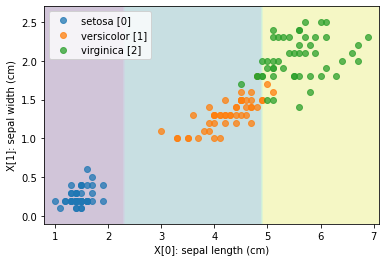

In [241]:
import matplotlib.pyplot as plt

def plotDecisao(modelo, X, y):
    modelo.fit(X, y)
    x0s = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 100)
    x1s = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    Xdec = np.c_[x0.ravel(), x1.ravel()]
    ypred = modelo.predict(Xdec)
    plt.contourf(x0, x1, ypred.reshape(x0.shape), alpha=0.25)
    for k in set(y):
        plt.plot(X[:,0][y==k], X[:,1][y==k], "o", label=f"{iris.target_names[k]} [{k}]", alpha=0.75)
    plt.xlabel(f"X[0]: {iris.feature_names[0]}")
    plt.ylabel(f"X[1]: {iris.feature_names[1]}")
    plt.legend()
    plt.show()

plotDecisao(modelo, X, y)

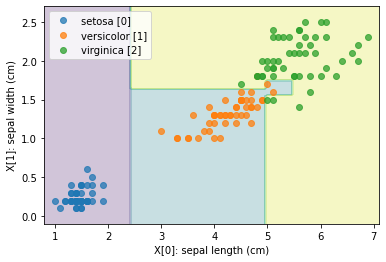

In [242]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
plotDecisao(dt, X, y)